Loading data from parquet files...
Train samples: 5000 | Test samples: 1000


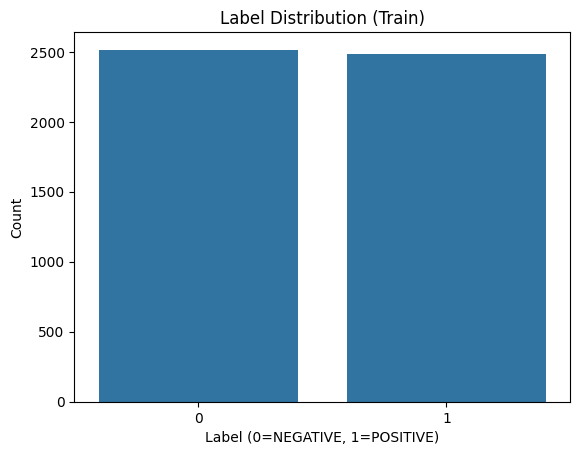

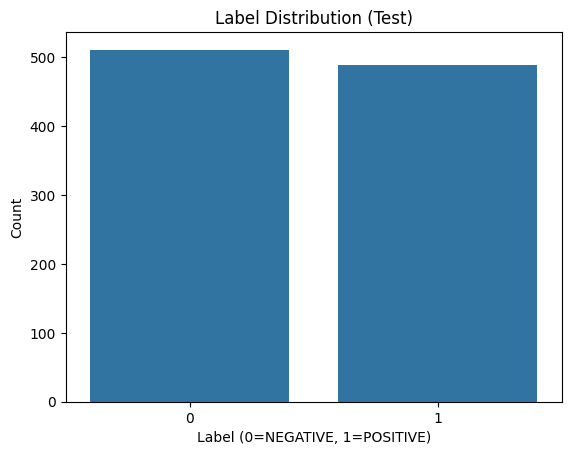

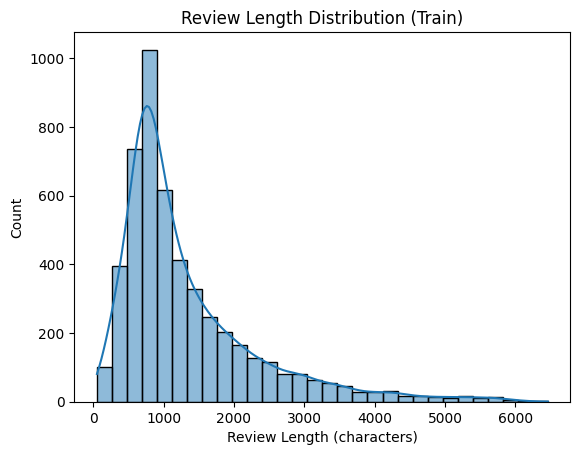

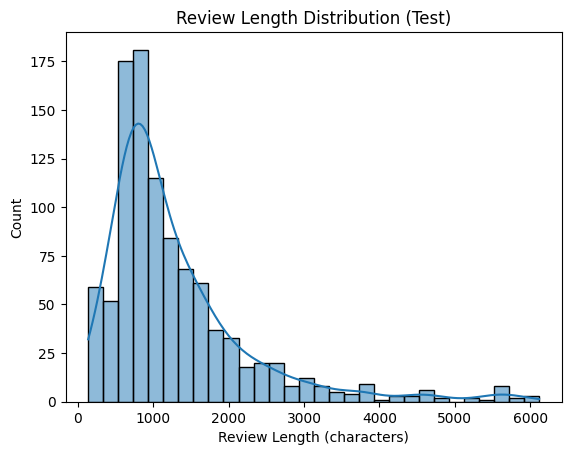

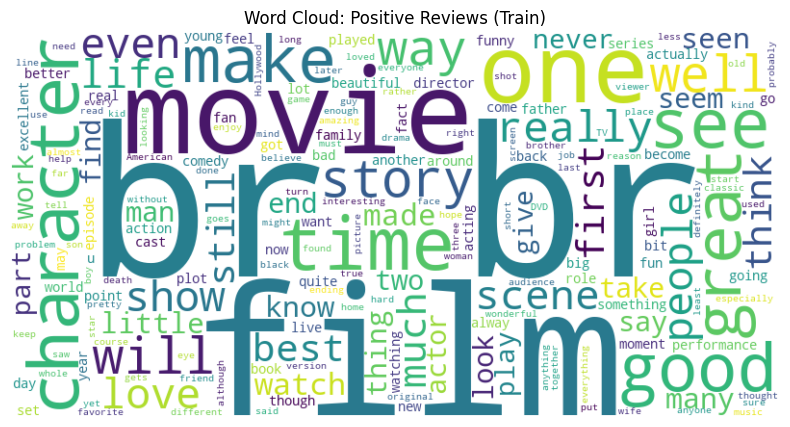

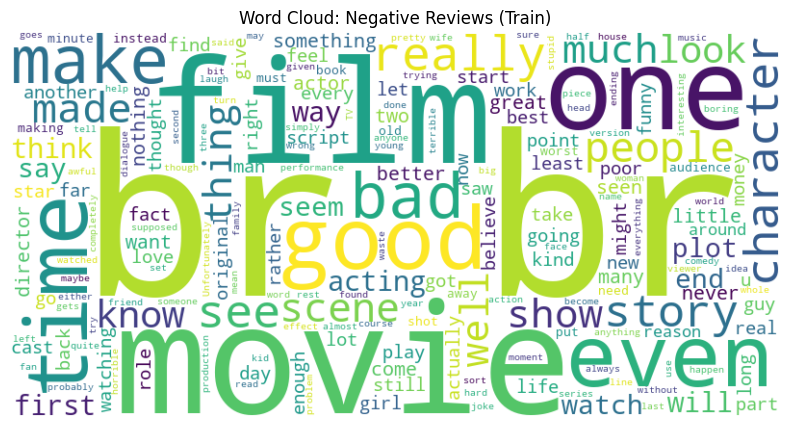

In [ ]:
#%%

# EDA
"""
Script for basic EDA (Exploratory Data Analysis) on the IMDB sentiment dataset.
Plots distribution of labels, review lengths, and a few example word clouds.
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def load_data():
    """Load train and test data from parquet files or Hugging Face dataset as fallback."""
    train_path = os.path.join("../data/raw/train.parquet")
    test_path = os.path.join("../data/raw/test.parquet")
    
    print("Loading data from parquet files...")
    train_df = pd.read_parquet(train_path)
    test_df = pd.read_parquet(test_path)
    return train_df, test_df

def plot_label_distribution(df, title):
    sns.countplot(x='label', data=df)
    plt.title(title)
    plt.xlabel('Label (0=NEGATIVE, 1=POSITIVE)')
    plt.ylabel('Count')
    plt.show()

def plot_review_length_distribution(df, title):
    df['review_length'] = df['text'].apply(len)
    sns.histplot(df['review_length'], bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Count')
    plt.show()

def plot_wordcloud(df, label, title):
    text = ' '.join(df[df['label'] == label]['text'].sample(min(1000, df[df['label'] == label].shape[0]), random_state=42))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def main():
    train_df, test_df = load_data()
    print(f"Train samples: {len(train_df)} | Test samples: {len(test_df)}")

    # Label distribution
    plot_label_distribution(train_df, "Label Distribution (Train)")
    plot_label_distribution(test_df, "Label Distribution (Test)")

    # Review length distribution
    plot_review_length_distribution(train_df, "Review Length Distribution (Train)")
    plot_review_length_distribution(test_df, "Review Length Distribution (Test)")

    # Word clouds
    plot_wordcloud(train_df, 1, "Word Cloud: Positive Reviews (Train)")
    plot_wordcloud(train_df, 0, "Word Cloud: Negative Reviews (Train)")

if __name__ == "__main__":
    main()